In [1]:
from vit_jax import models
import jax
import jax.numpy as jnp
from PIL import Image
import numpy as np
import glob
import os

2023-08-19 12:50:18.439221: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
model_name = 'LiT-B16B'
lit_model = models.get_model(model_name)
lit_variables = lit_model.load_variables()
tokenizer = lit_model.get_tokenizer()
image_preprocessing = lit_model.get_image_preprocessing()
pp = lit_model.get_pp()

# Tách file txt

In [25]:
import numpy as np
import os
import pandas as pd
import glob
import json

ocr_inf = "data/OCR_ASR/info_ocr_loc.txt"

df_ocr = pd.read_csv(ocr_inf, delimiter=",", header=None)
# df_ocr.columns = ["video_id", "frame_id", "asr"] 
df_ocr[0].unique()

root_data = "data/OCR_ASR/Content_OCR_txt/"
json_path = "data/faiss_merge_files/keyframes_id.json"


def load_json(json_path: str):
    with open(json_path, "r")  as f:
        js = json.loads(f.read())
    return {int(k): v for k, v in js.items()}
id2img_fps = load_json(json_path)

for id, values in id2img_fps.items():
    Embed_txt_C00 = values['image_path'].split("/")[-2]
    os.makedirs(f"{root_data}/{Embed_txt_C00}", exist_ok = True)
    list_shot_id = values['list_shot_id']
    start, end = int(list_shot_id[0]), int(list_shot_id[-1])
    content = ""
    with open(f"{root_data}/{Embed_txt_C00}/{Embed_txt_C00}_{start}_{end}.txt", "w") as file:
        content_txt = df_ocr.loc[(df_ocr[1]>=start) & (df_ocr[1]<= end)][2]
        for i in content_txt:
            content += (" "+i)
        file.write(content)
        print(f"Saved: {root_data}/{Embed_txt_C00}/{Embed_txt_C00}_{start}_{end}.txt")


Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_0_158.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_0_158.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_0_158.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_0_158.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_0_158.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_0_158.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_160_202.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_160_202.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_160_202.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_160_202.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_160_202.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_204_523.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_204_523.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000/C00_V0000_204_523.txt
Saved: data/OCR_ASR/Content_OCR_txt//C00_V0000

# Create npy file

In [36]:
import googletrans
import translate

class Translation:
    def __init__(self, from_lang='vi', to_lang='en', mode='google'):
        # The class Translation is a wrapper for the two translation libraries, googletrans and translate. 
        self.__mode = mode
        self.__from_lang = from_lang
        self.__to_lang = to_lang

        if mode in 'googletrans':
            self.translator = googletrans.Translator()
        elif mode in 'translate':
            self.translator = translate.Translator(from_lang=from_lang,to_lang=to_lang)

    def preprocessing(self, text):
        """
        It takes a string as input, and returns a string with all the letters in lowercase
        :param text: The text to be processed
        :return: The text is being returned in lowercase.
        """
        return text.lower()

    def __call__(self, text):
        """
        The function takes in a text and preprocesses it before translation
        :param text: The text to be translated
        :return: The translated text.
        """
        text = self.preprocessing(text)
        return self.translator.translate(text) if self.__mode in 'translate' \
                else self.translator.translate(text, dest=self.__to_lang).text
    
translate = Translation()

In [37]:
text = "Con covid ]"
text = translate(text)
text

'With Covid]'

In [39]:
import os 
import glob
import numpy as np


os.system('TF_CPP_MIN_LOG_LEVEL=0')

root_path = "data/OCR_ASR/"
txt_paths = glob.glob('data/OCR_ASR/Content_OCR_txt/*/*.txt')
txt_paths = sorted(txt_paths)

for txt_path in txt_paths:
    bath_name = "Embed_npy_OCR_LIT"
    video_name = txt_path.split("/")[-2]
    
    des_path = f'{root_path}/{bath_name}/{video_name}'
    os.makedirs(des_path, exist_ok=True)

    with open(txt_path, "rb") as f:
        line = f.read()

    line = line.decode("utf-8")
    # print(line)
    text = [line, ]
    print(text)
    if text[0] == '' :
        print(f'Skip: {txt_path}')
        continue
    else:
        text = [translate(text[0]),]
        # print(text)
        tokens = tokenizer([text])
        _, text_embeddings, _ = lit_model.apply(lit_variables, tokens=tokens)
        name_npy = txt_path.split('/')[-1].replace('.txt', '')
        outfile = f'{des_path}/{name_npy}.npy'
        np.save(outfile, text_embeddings)

[' htv hd  htvs hd giây  hd ']
[' htmship tinchinh q ve vie vie vie đoàn việt nam giành huy chương vàng giây seagames  hizzied tinchinh ve viet vie vie đoàn việt nam giành huy chương vàng giây seagames  hivshi tinchinh ve vie vie vie đoàn việt nam giành huy chương vàng giây seagames  htvship tinchinh q ve c vie vie vie đoàn việt nam giành huy chương vàng giây seagames  htv hd giay gray httshi glay giây htv hd giây']
['  htvihd hd khẩu từ ucraina trong ec tuyên bố đạt tiến triển trong đàm phán về lệnh cấm vận dầu mỏ của nga  htvihd hd nguyên bố đạt tiến triển trong đàm phán về lệnh cấm vận dầu mỏ của nga nga chuyến thêm v  htmind hd và phán về lệnh cấm vận dầu mỏ của nga an nga chuyển thêm viện trợ nhân đạo tới ucraina  htmind hd bệnh cấm vận dầu mỏ của nga nga chuyển thêm viện trợ nhân đạo tới ucraina p chương trình giay htmind hd pháp để ngỏ khả năng eu nga chuyển thêm viện trợ nhân đạo tới ucraina nga chương trình giây giây trên htvt htmind hd pháp để ngỏ khả năng eu đạt thỏa thuận v

# Create bin file

In [9]:
import numpy as np
import faiss
import glob
import json
import matplotlib.pyplot as plt
import os
import math
import torch
import pandas as pd
from tqdm import tqdm




import googletrans
import translate

class Translation:
    def __init__(self, from_lang='vi', to_lang='en', mode='google'):
        # The class Translation is a wrapper for the two translation libraries, googletrans and translate. 
        self.__mode = mode
        self.__from_lang = from_lang
        self.__to_lang = to_lang

        if mode in 'googletrans':
            self.translator = googletrans.Translator()
        elif mode in 'translate':
            self.translator = translate.Translator(from_lang=from_lang,to_lang=to_lang)

    def preprocessing(self, text):
        """
        It takes a string as input, and returns a string with all the letters in lowercase
        :param text: The text to be processed
        :return: The text is being returned in lowercase.
        """
        return text.lower()

    def __call__(self, text):
        """
        The function takes in a text and preprocesses it before translation
        :param text: The text to be translated
        :return: The translated text.
        """
        text = self.preprocessing(text)
        return self.translator.translate(text) if self.__mode in 'translate' \
                else self.translator.translate(text, dest=self.__to_lang).text
    

class MyFaiss:
    def __init__(self, root_database: str, bin_file: str, json_path: str):
        self.index = self.load_bin_file(bin_file)
        self.id2img_fps = self.load_json_file(json_path)
        self.translater = Translation()
        self.__device = "cuda" if torch.cuda.is_available() else "cpu"
        # self.model, preprocess = clip.load("ViT-B/16", device=self.__device)

    def load_bin_file(self, bin_file: str):
        return faiss.read_index(bin_file)
    
    def load_json_file(self, json_bath: str):
        with open(json_bath, "r") as f:
            js = json.loads(f.read())

        return {int(k): v for k, v in js.items()}
    def show_images(self, image_paths):
        fig = plt.figure(figsize=(15, 10))
        columns = int(math.sqrt(len(image_paths)))
        rows = int(np.ceil(len(image_paths)/columns))

        for i in range(1, columns*rows +1):
            img = plt.imread(image_paths[i - 1])
            ax = fig.add_subplot(rows, columns, i)
            ax.set_title('/'.join(image_paths[i - 1].split('/')[-3:]))

            plt.imshow(img)
            plt.axis("off")

        plt.show()

In [10]:
from vit_jax import models
import jax
import jax.numpy as jnp
from PIL import Image
import numpy as np
import glob
import os

class BERTSearch(MyFaiss):
    def __init__(self, dict_bert_search = 'data/OCR_ASR/keyframes_id_bert.json', bin_file = 'data/OCR_ASR/faiss_beart_OCR_LIT.bin', mode = 'write' ):
        if mode == 'search':
            self.model = models.get_model(model_name)
            self.index =  super().load_bin_file(bin_file)
            self.id2img_fps = super().load_json_file(dict_bert_search)
            
        else:
            pass
    def create_files(self, des_json: str, dict_support_model:str, des_bin: str):
        count = 0
        self.infos = []
        id2img_fps = super().load_json_file(dict_support_model)
        npy_paths = sorted(glob.glob("data/OCR_ASR/Embed_npy_OCR_LIT/*/*.npy"))
        index = faiss.IndexFlatL2(768)

        for npy_path in tqdm(npy_paths):
            need_path = npy_path.split('/')[-1].replace('.npy','')
            for id, values in id2img_fps.items():
                image_path = values['image_path']
                list_shot_id = values['list_shot_id']
                start, end = int(list_shot_id[0]), int(list_shot_id[-1])
                check_path = image_path.split('/')[-2] + f"_{start}_{end}"
                # print("Need_path",need_path)
                # print("Check_path",check_path)
                # break
                if need_path == check_path:
                    # print("Satisfy the condition")
                    info = {
                        "video_path": '/'.join(image_path.split('/')[:-1]),
                        "list_shot_id": list_shot_id
                    }
                    self.infos.append(info)

                    try:
                        feat = np.load(npy_path)

                    except:
                        print(npy_path)

                    feat = feat.astype(np.float32).reshape(1,-1)
                    index.add(feat)
                    id2img_fps.pop(id)
                    count += 1
                    break

        results = dict(enumerate(self.infos)) 

        ##### SAVE JSON FILE #####
        with open(des_json, 'w') as f:
            f.write(json.dumps(results))

        faiss.write_index(index, des_bin)

        print(f'Saved {des_json}')
        print(f"Number of Index: {count}")
        print(f'Saved {des_bin}')

    def bert_search(self, text, k):
        os.system('TF_CPP_MIN_LOG_LEVEL=0')
        lit_model = models.get_model(model_name)
        tokenizer = lit_model.get_tokenizer()
        lit_variables = lit_model.load_variables()
        tokens = tokenizer([text])
        _, text_features, _ = lit_model.apply(lit_variables, tokens=tokens)

        scores, idx_image = self.index.search(np.array(text_features), k=k)
        idx_image = idx_image.flatten()

        infos_query = list(map(self.id2img_fps.get, list(idx_image)))
        print(infos_query)
        # image_paths = [info['video_path'] for info in infos_query]
        image_paths =  [os.path.join(info['video_path'],f"{info['list_shot_id'][0]}.jpg") for info in infos_query]
        return scores, idx_image, infos_query, image_paths

In [11]:
create_file = BERTSearch()
create_file.create_files(des_json='data/OCR_ASR/keyframes_id_bert.json', dict_support_model='data/faiss_merge_files/keyframes_id.json', des_bin='data/OCR_ASR/faiss_bert_OCR_LIT.bin')

100%|██████████| 489/489 [00:00<00:00, 711.29it/s] 

Saved data/OCR_ASR/keyframes_id_bert.json
Number of Index: 489
Saved data/OCR_ASR/faiss_bert_OCR_LIT.bin



⚠️ Reusing local copy: LiT-B16B.npz
[{'video_path': 'data/KeyFramesC00_V00/C00_V0000', 'list_shot_id': ['016532', '016540', '016548', '016556']}, {'video_path': 'data/KeyFramesC00_V00/C00_V0001', 'list_shot_id': ['017826', '017896', '017967', '018001', '018037']}, {'video_path': 'data/KeyFramesC00_V00/C00_V0000', 'list_shot_id': ['017590', '017613', '017636', '017659', '017683']}, {'video_path': 'data/KeyFramesC00_V00/C00_V0000', 'list_shot_id': ['004300', '004310', '004320', '004330', '004340']}, {'video_path': 'data/KeyFramesC00_V00/C00_V0000', 'list_shot_id': ['014403', '014533', '014558', '014613', '014723', '014777', '014885']}, {'video_path': 'data/KeyFramesC00_V00/C00_V0000', 'list_shot_id': ['017799', '017831', '017863', '017895']}, {'video_path': 'data/KeyFramesC00_V00/C00_V0000', 'list_shot_id': ['011688', '011702', '011717', '011732']}, {'video_path': 'data/KeyFramesC00_V00/C00_V0000', 'list_shot_id': ['020973', '021021', '021070', '021093', '021119']}, {'video_path': 'data

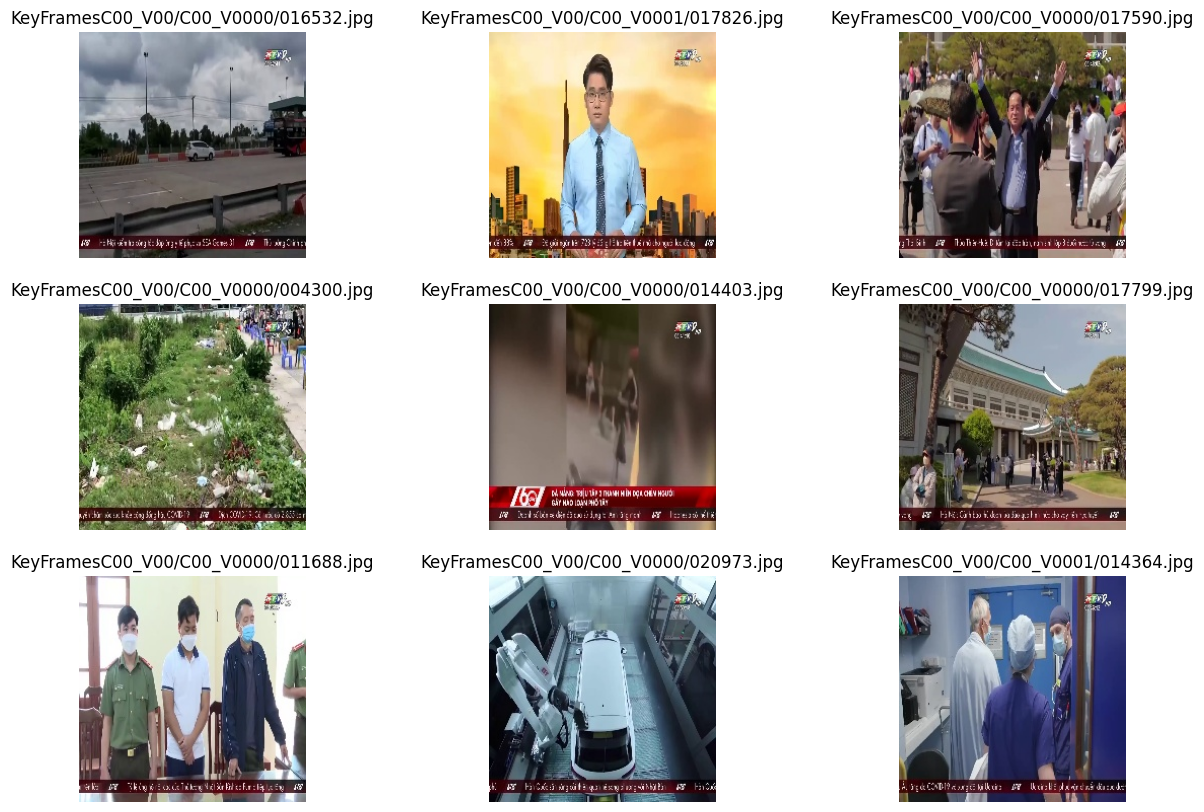

In [13]:
mybert = BERTSearch(dict_bert_search='data/OCR_ASR/keyframes_id_bert.json', bin_file='data/OCR_ASR/faiss_bert_OCR_LIT.bin', mode='search')

text = 'hà nội kiểm tra công tác đáp ứng y tế '

scores, idx_image, infos_query, image_paths = mybert.bert_search(text, k=9)
mybert.show_images(image_paths)